Exp2023-10-03/2
## Clock mutants phenotypes under short- and long-day light regime



***Motivation***: Clock mutants show different rhythmic properties under different light conditions

Author: Ines Boehm, Tomasz Zieliński

---



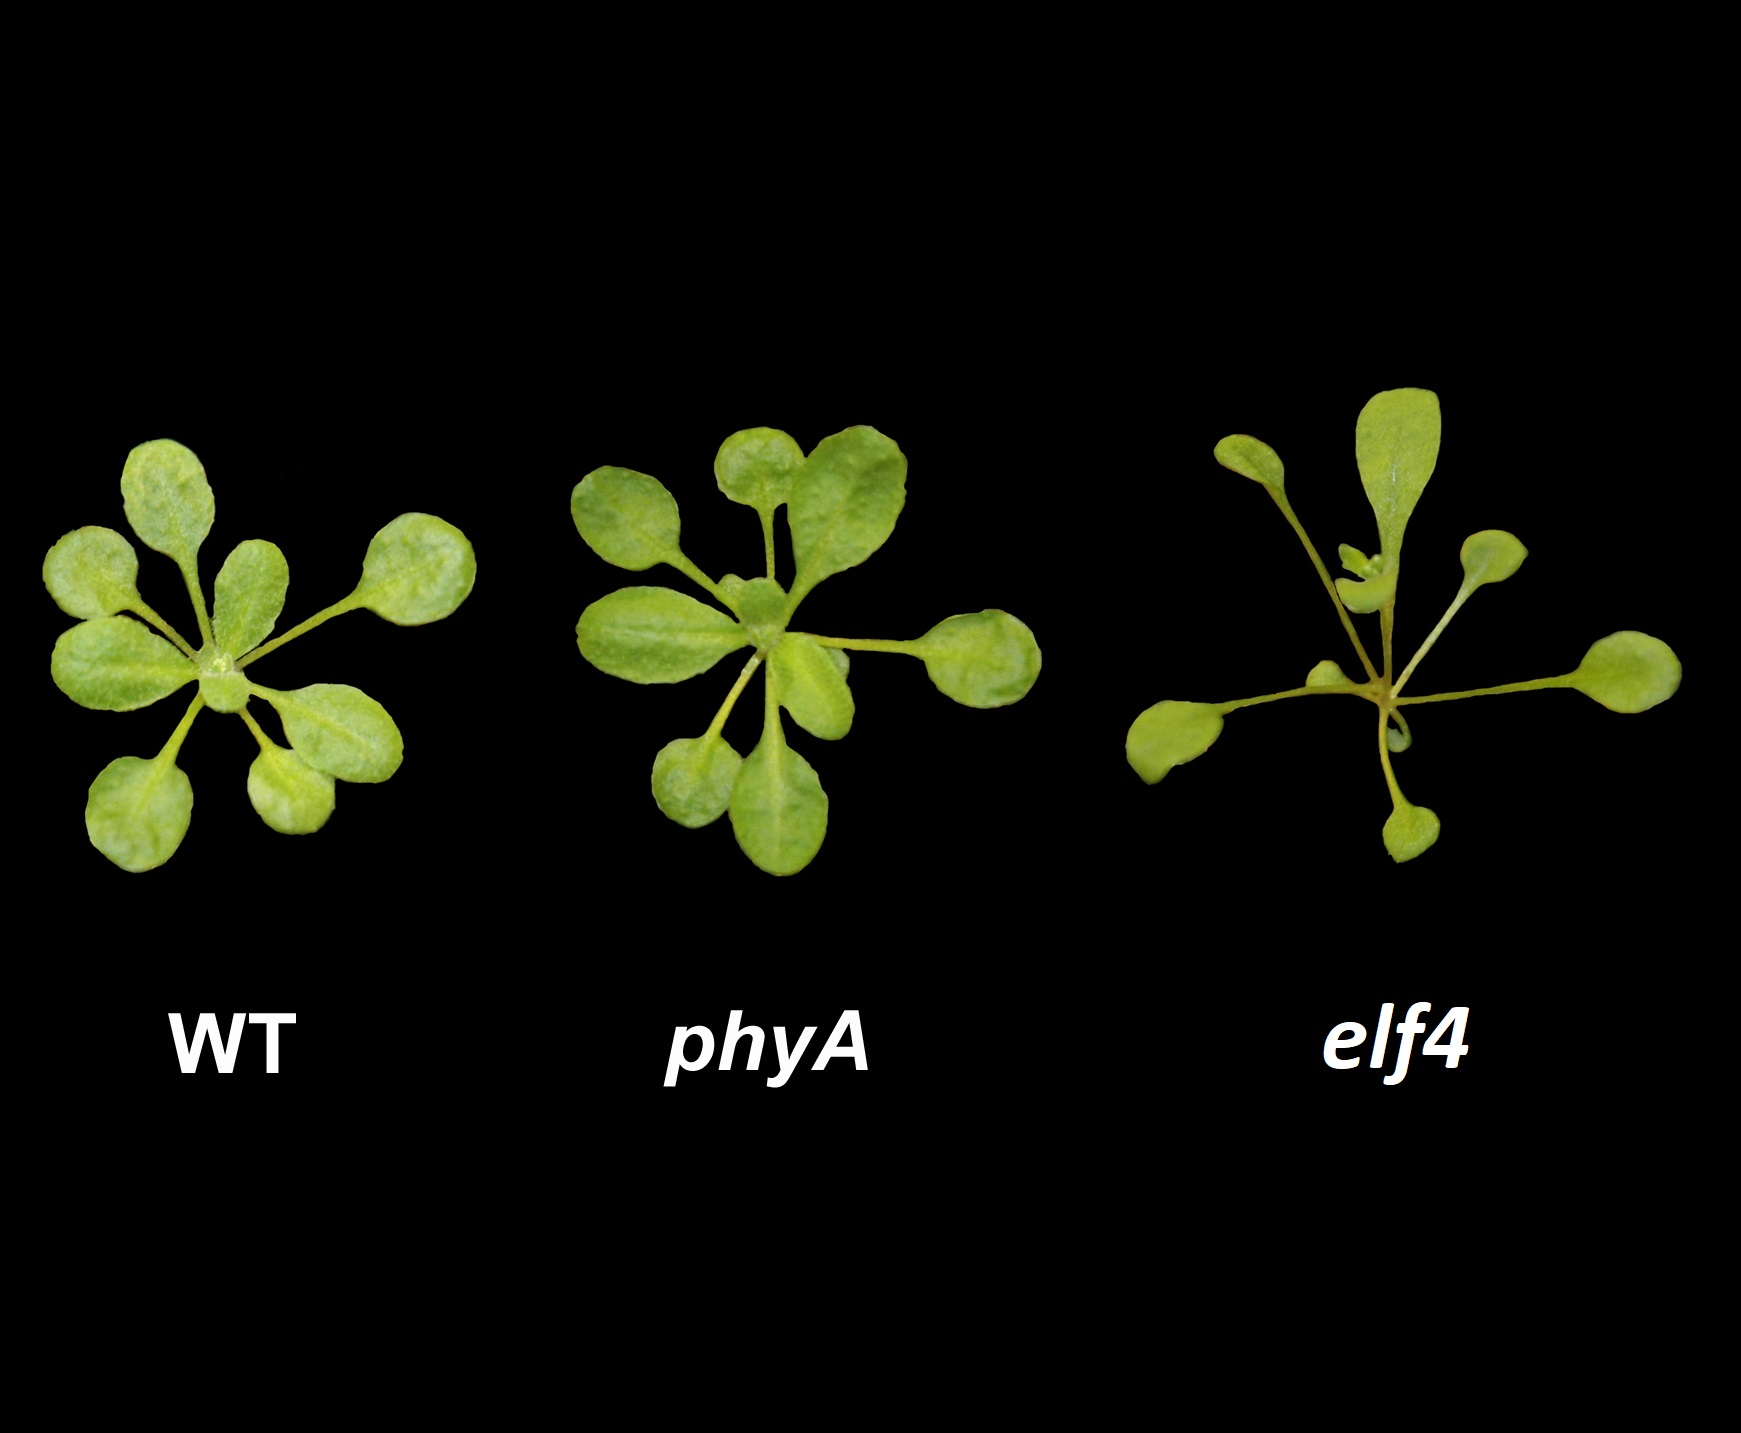

Phenotypes of 3-week-old plants under short days.

**Experiment details:**  
Growth protocol: https://bio-protocol.org/bio101/e126  
Rhythmic properties : Bioluminescence Assay (https://doi.org/10.1007/978-1-0716-2249-0_27),  
Period analysis with BioDare (https://doi.org/10.1007/978-1-0716-1912-4_2)  
Metabolic protocols: Chlorophyll and starch assay (https://doi.org/10.1038/nprot.2009.12),  
Quantification of starch (https://doi.org/10.1038/nprot.2006.232)  

Study date range: 2019-12-05 to 2020-01-05

Experimental conditions:
* SD = *short days 6h light (6:18 LD)*
* LD = *long days 18h light (18:6 LD)*

**Tested genotypes:**
* WT
* prr79
* elf4

**Tested markers:**
* LHY
* PRR5
* TOC1

8 replicates per line


---

> This file is part of the Reusable Analysis 
> lesson within the [FAIR in (circadian) practice](https://biordm.github.io/fair-in-circadian-practice/)

---

In [75]:
#################################################
#                                               #
# Hashtags are not run as code and are used for #
# annotation of code in R (they start comments).#
#################################################

# load required libraries
library(ggplot2)
library(dplyr)
library(knitr)




In [76]:
# Getting the data
# read data: periods assesments for each line from a csv file
# the read values are stored as a DataFrame, a tabular form of the data

all_data <- read.delim(file = "light-conditions_ppa.csv", stringsAsFactors=TRUE, header = TRUE, sep = ",", dec = ".")

In [77]:
# print the first few raw of the data frame
# our data are stored in a "all_data" variable

kable(all_data)



|Label      |GENOTYPE |MARKER |CONDITION |   Period| Amplitude|      Phase|       RAE|
|:----------|:--------|:------|:---------|--------:|---------:|----------:|---------:|
|WT LHY     |WT       |LHY    |SD        | 23.96202| 0.0909104|  4.2834321| 0.2524624|
|WT LHY     |WT       |LHY    |SD        | 24.09299| 0.1127056|  2.8208942| 0.1692445|
|WT LHY     |WT       |LHY    |SD        | 24.03893| 0.1409309|  2.6465345| 0.2533674|
|WT LHY     |WT       |LHY    |SD        | 23.21862| 0.1143881|  3.3345406| 0.2269200|
|WT LHY     |WT       |LHY    |SD        | 24.59790| 0.1119668|  3.9782478| 0.2425303|
|WT LHY     |WT       |LHY    |SD        | 22.81148| 0.1441194|  2.1015084| 0.2456280|
|WT LHY     |WT       |LHY    |SD        | 24.22480| 0.0951132|  3.4468619| 0.2059666|
|WT LHY     |WT       |LHY    |SD        | 24.05496| 0.1281219|  2.9643092| 0.2044292|
|WT PRR5    |WT       |PRR5   |SD        | 24.43088| 0.1329031|  9.3598555| 0.2623814|
|WT PRR5    |WT       |PRR5   |SD        

**Table 1:** For each geneotype and maker combination, period, phase and amplitude were estimated using luciferase assay and FFT NLLS method 

**Note:**
Each line had 8 biological replicates. Period analysis was conducted using BioDare2 system.

# Visualise and analyse data for long days

In [78]:
# selecting subset of the data with LD only

df <- subset(all_data, CONDITION == 'SD')
head(df)

,Label,GENOTYPE,MARKER,CONDITION,Period,Amplitude,Phase,RAE
,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,WT LHY,WT,LHY,SD,23.96202,0.09091037,4.283432,0.2524624
2,WT LHY,WT,LHY,SD,24.09299,0.11270556,2.820894,0.1692445
3,WT LHY,WT,LHY,SD,24.03893,0.14093095,2.646534,0.2533674
4,WT LHY,WT,LHY,SD,23.21862,0.11438814,3.334541,0.2269200
5,WT LHY,WT,LHY,SD,24.59790,0.11196684,3.978248,0.2425303
6,WT LHY,WT,LHY,SD,22.81148,0.14411940,2.101508,0.2456280


SELECTION worked as data starts with LD and rows numbers are 73, 74....

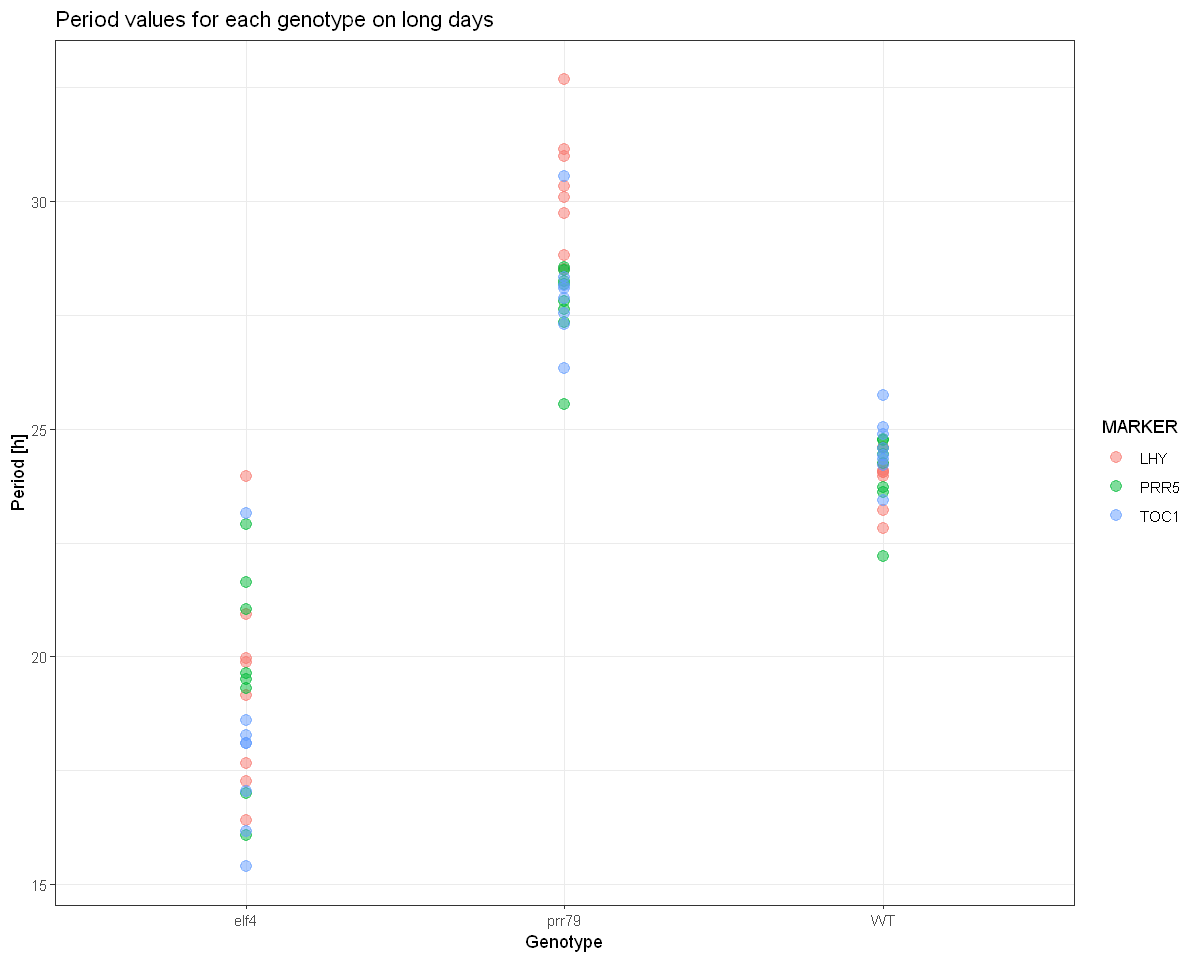

In [79]:
# Plot period values for each line tested

# change size of plot so it fits the screen before plotting
options(repr.plot.width = 10, repr.plot.height = 8)

# ggplot creates plot, first parameter is the underlying data == df
# then we say what should be used as x, y values and how to color the plots
# we color by Label, so each line will have distinct color
# Pay attention to '+' after each command, this is how different parts of plot are assembled togheter

ggplot(df, mapping = aes(x = GENOTYPE, y = Period, fill = MARKER, color = MARKER)) + 
    # creates scatter plot, alternative could be geom_boxplot to make box and whisker plots
    geom_point(size=3, alpha=0.5) +
    # describe the plots, with title and scale labels
    labs(title = "Period values for each genotype on long days",
        x = "Genotype", 
        y = "Period [h]") +
    theme_bw() 

### I will use the box plots instead as they are easier to read

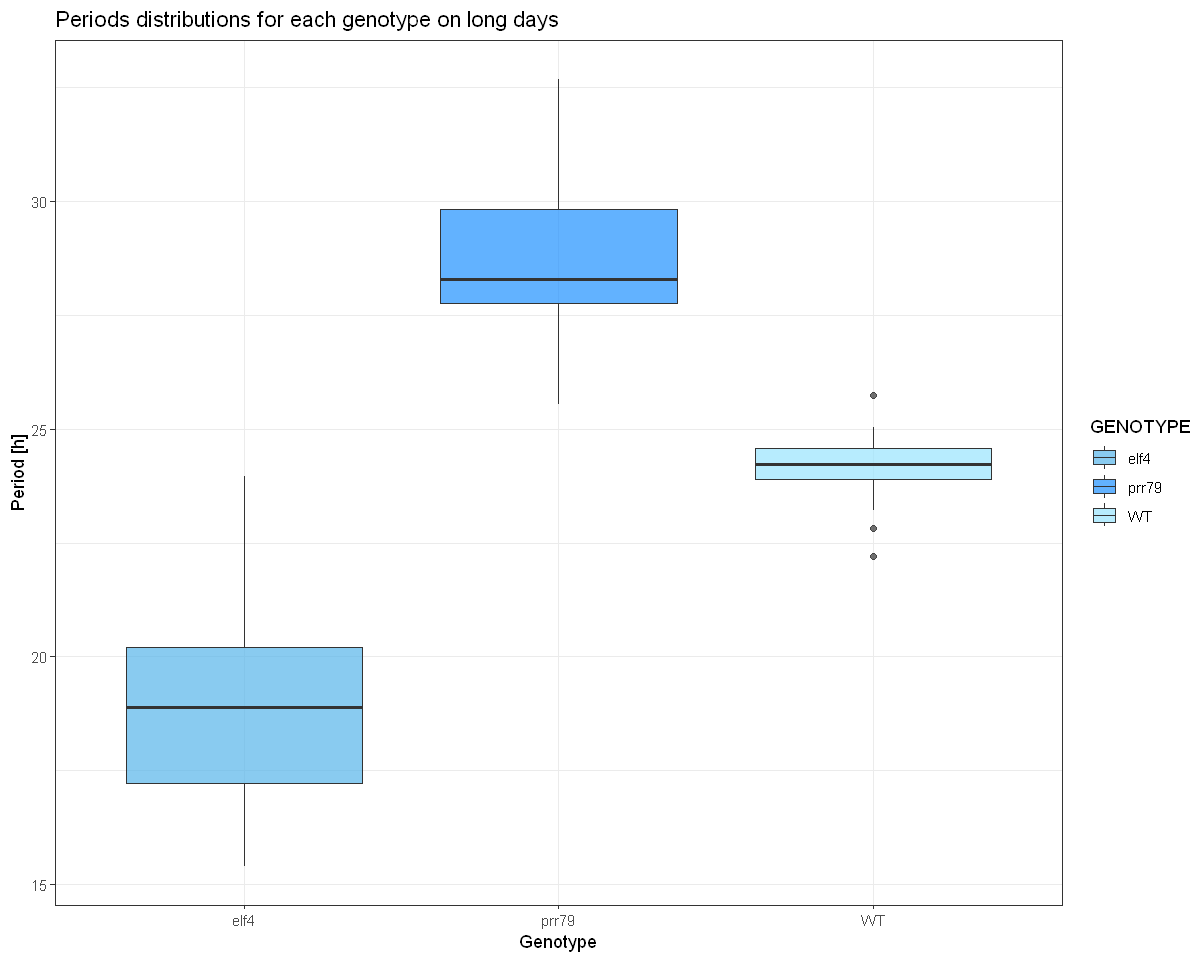

In [80]:
# Plot period distributions for each genotype

# ggplot creates plot, first parameter is the underlying data == df
# then we say what should be used as x, y values and how to color the plots
# we color by Label, so each line will have distinct color
# Pay attention to '+' after each command, this is how different parts of plot are assembled togheter

ggplot(df, mapping = aes(GENOTYPE, y = Period, fill = GENOTYPE)) + 
    # creates box plot
    geom_boxplot(alpha=0.7) +
    # describe the plots, with title and scale labels
    labs(title = "Periods distributions for each genotype on long days",
        x = "Genotype", 
        y = "Period [h]") +
    # setting colors manually    
    scale_fill_manual(values=c("#56B4E9", "dodgerblue", "#98e4fe")) +    
    theme_bw() 

### Period values are different between genotypes

Run anova tests to test it

In [81]:
# running anova test and storing results for posthoc tests
mod <- aov(Period ~ GENOTYPE, data = df)
summary(mod)

#running post-hoc test which pair of genotypes differ
res <- TukeyHSD(mod)
res

            Df Sum Sq Mean Sq F value Pr(>F)    
GENOTYPE     2   1111   555.7   192.6 <2e-16 ***
Residuals   69    199     2.9                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Period ~ GENOTYPE, data = df)

$GENOTYPE
                diff       lwr       upr p adj
prr79-elf4  9.617219  8.442798 10.791640     0
WT-elf4     5.109447  3.935026  6.283868     0
WT-prr79   -4.507772 -5.682193 -3.333351     0


.... add interpretation

## Extra tasks

### RAE plot
Prepare Relative Amplitude Error Plot from the data (long or short day), which plots period values vs their RAE.  
That helps to visualise the data as now they become 2D.

*Hints*
- use scatter plot from the top of the notebook as the base
- change the mappign so one dimension is period the other is RAE
- color by genotype*marker combination (check the values in other columns)
- do lines within genotype cluster togheter?

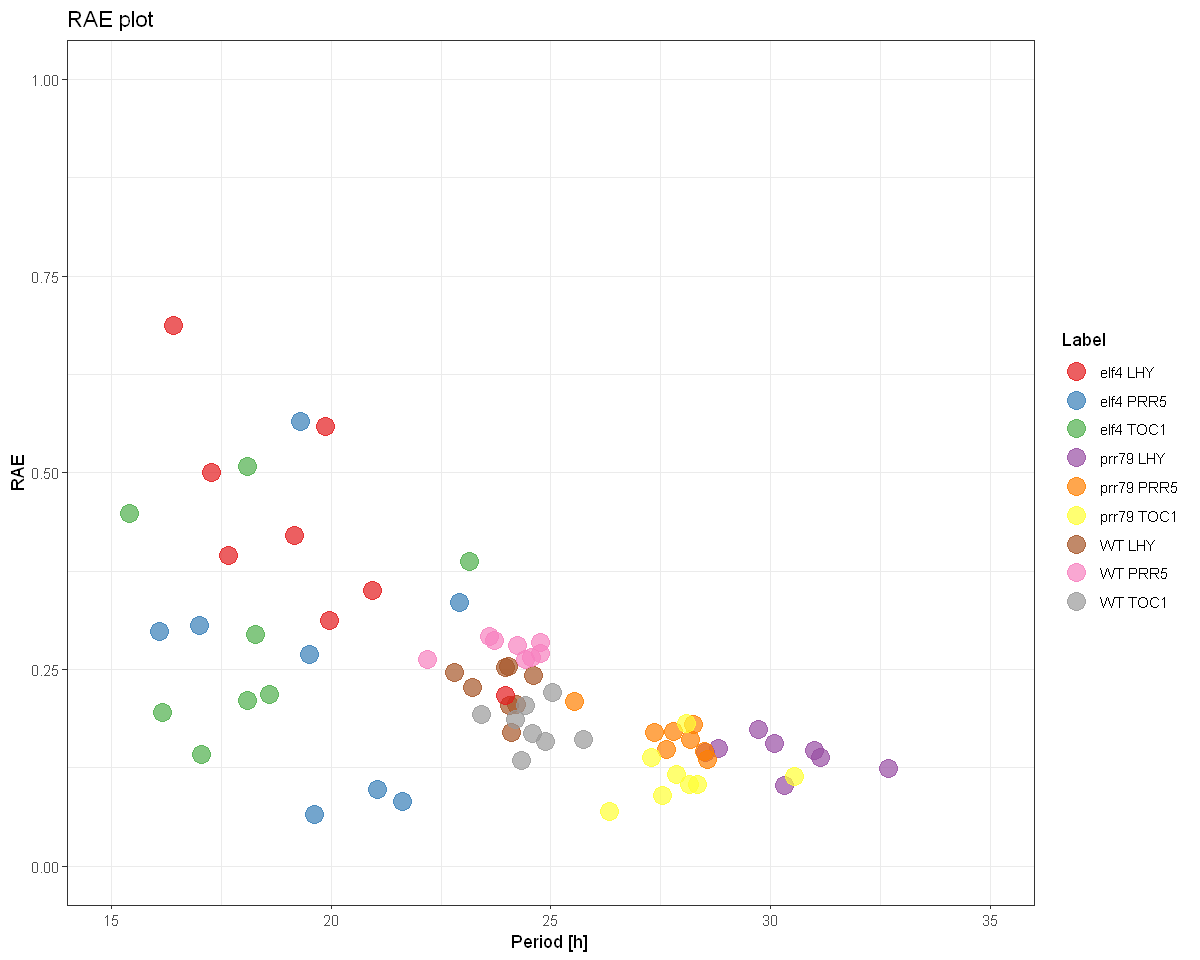

In [82]:
ggplot(df, mapping = aes(x = Period, y = RAE, fill = Label, color = Label)) + 
    # creates scatter plot, alternative could be geom_boxplot to make box and whisker plots
    geom_point(size=5, alpha=0.7) +
    # describe the plots, with title and scale labels
    labs(title = "RAE plot",
        x = "Period [h]", 
        y = "RAE") +
    scale_colour_brewer(palette = "Set1") +
    xlim(15, 35) +
    ylim(0, 1) +
    theme_bw() 

#### Phase vs genotype/marker

Plot phase distributions for each genotype
- Copy paste the code for period graph and adjust the mapping for x, y variables, plus labels
- Run it
- Now collor per Marker



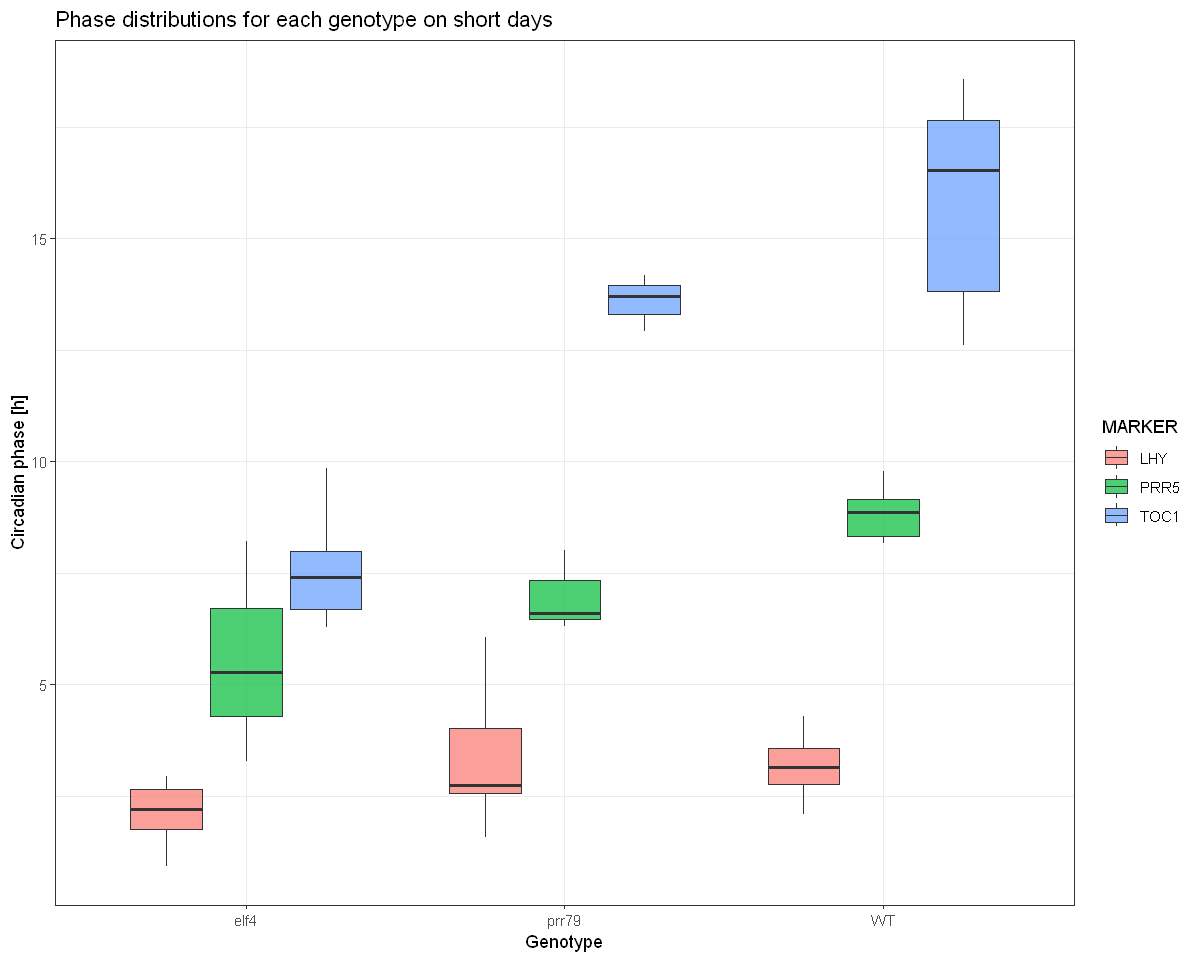

In [83]:
ggplot(df, mapping = aes(GENOTYPE, y = Phase, fill = MARKER)) + 
    # creates box plot
    geom_boxplot(alpha=0.7) +
    # describe the plots, with title and scale labels
    labs(title = "Phase distributions for each genotype on short days",
        x = "Genotype", 
        y = "Circadian phase [h]") +
    # setting colors manually    
    # scale_fill_manual(values=c("#56B4E9", "dodgerblue", "#98e4fe")) +    
    theme_bw() 

### Phase is better visualized on "clock" face.

Let's try to do a biodare like phase plot
- start with scatter plot that shows phase per line (so gentoype*marker combination)
- lets make x the phase, y the genotype and color by marker
- lets make y the RAE and color by line
- let's change the x axis to circular by adding ``` coord_polar() ```
- lets add radius lines with ```geom_bar(stat='identity')```
  

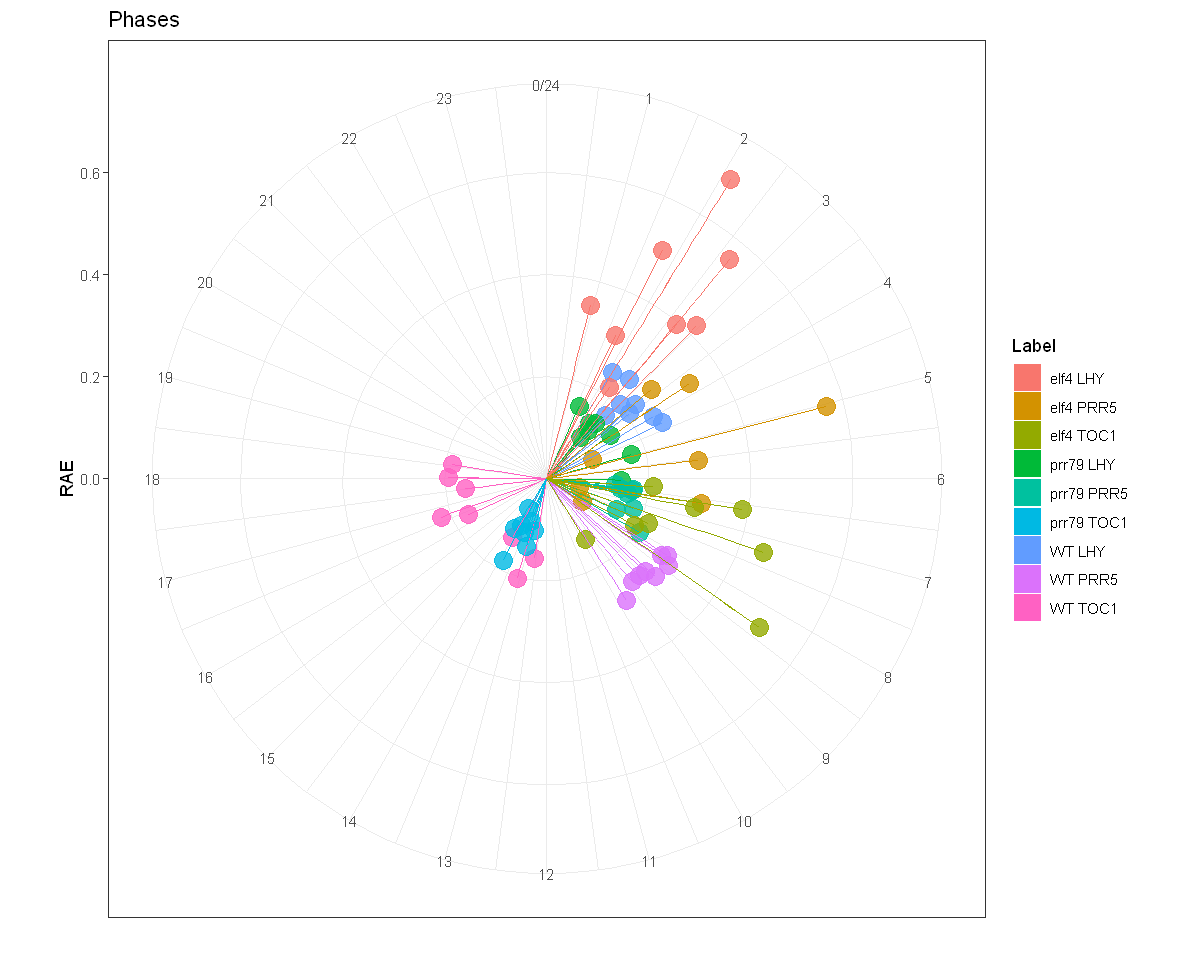

In [84]:
ggplot(df, mapping = aes(x = Phase, y = RAE, fill = Label, color = Label)) + 
    # creates scatter plot, alternative could be geom_boxplot to make box and whisker plots
    geom_point(size=5, alpha=0.8) +
    # describe the plots, with title and scale labels
    labs(title = "Phases",
        x = "Phase", 
        y = "RAE") +
    coord_polar()+
    geom_bar(stat='identity') +
    scale_x_continuous("", breaks = 0:24, limits = c(0, 24))+
    theme_bw() 

## Show differences between periods for long and short days for each line


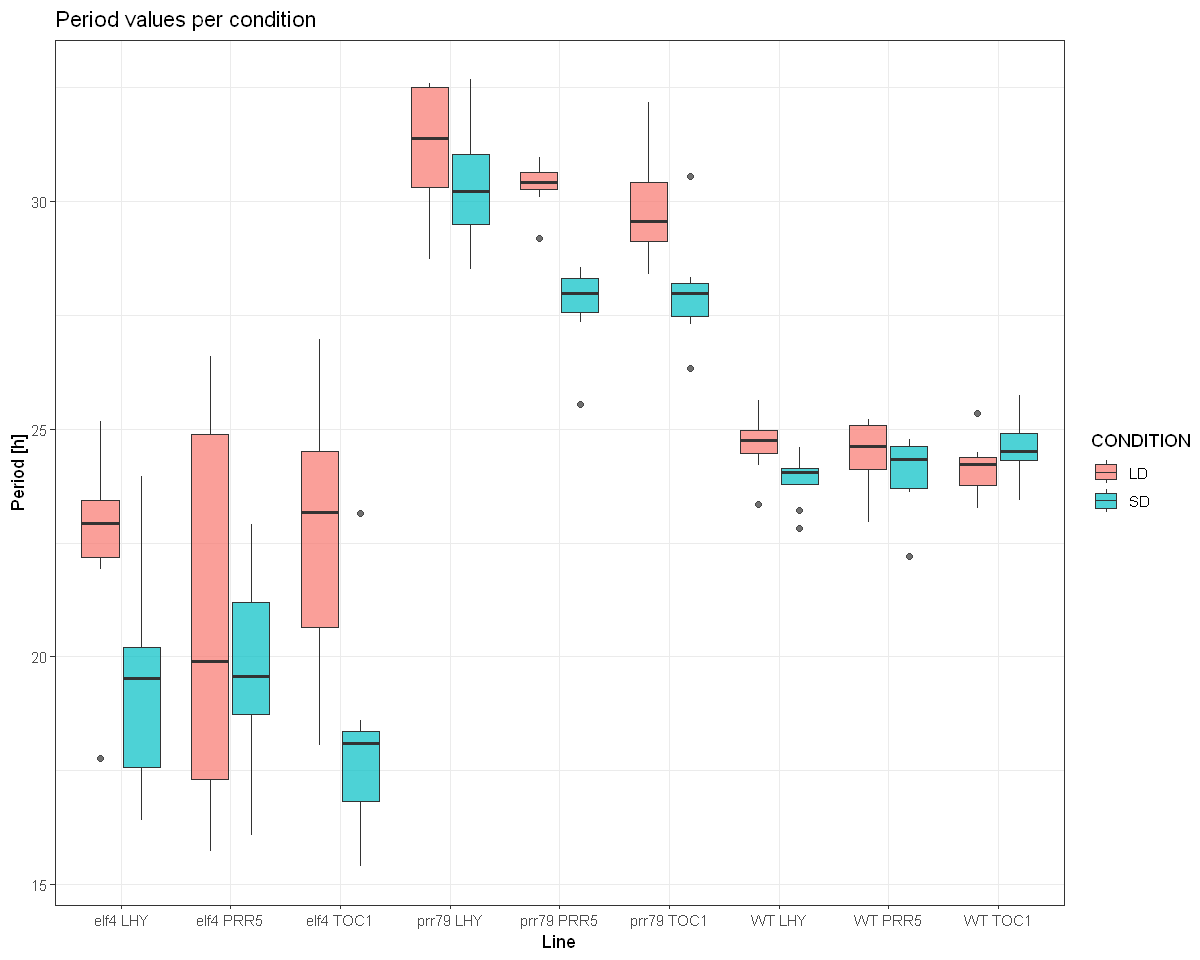

In [85]:
ggplot(all_data, mapping = aes(Label, y = Period, fill = CONDITION)) + 
    # creates box plot
    geom_boxplot(alpha=0.7) +
    # describe the plots, with title and scale labels
    labs(title = "Period values per condition",
        x = "Line", 
        y = "Period [h]") +
    # setting colors manually    
    # scale_fill_manual(values=c("#56B4E9", "dodgerblue", "#98e4fe")) +    
    theme_bw() 

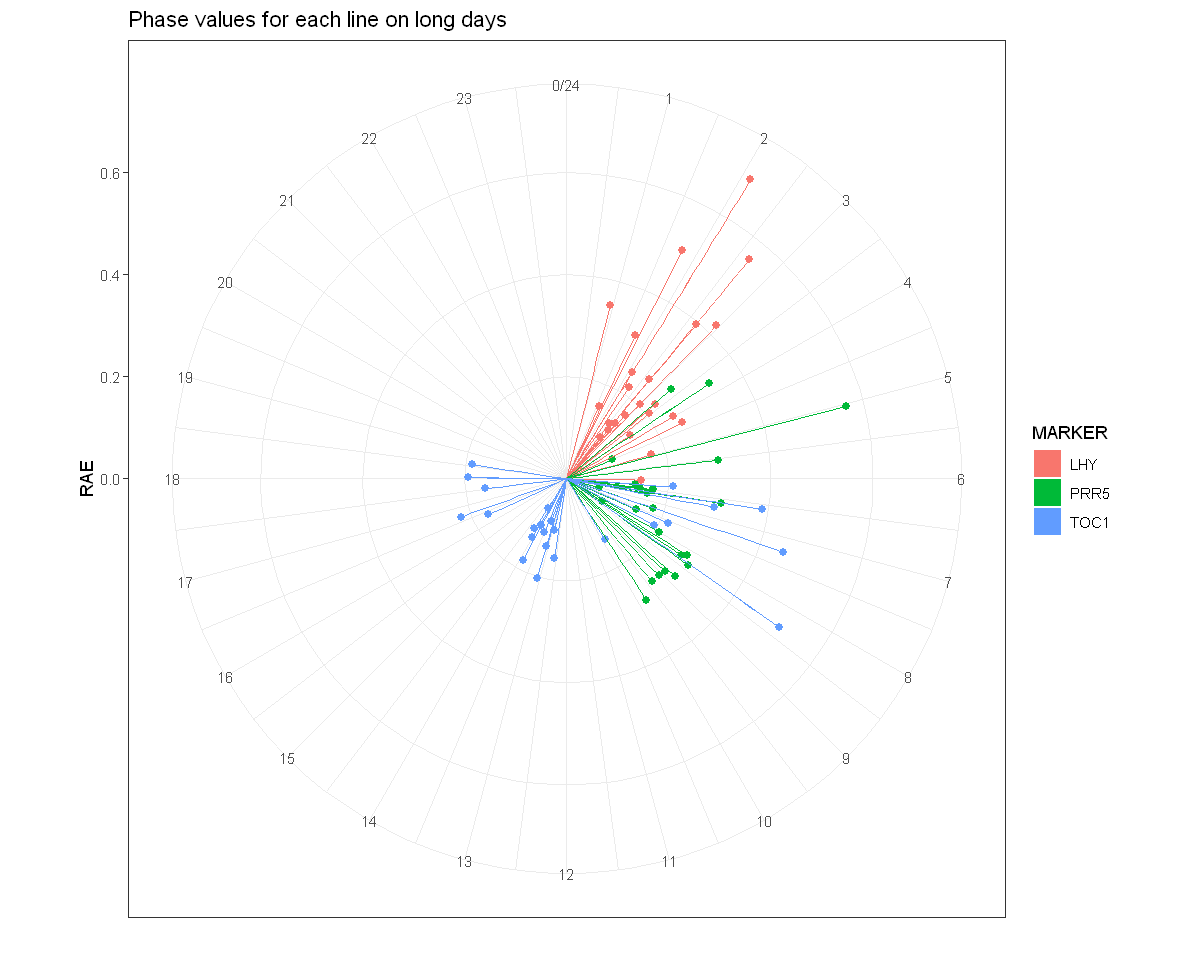

In [86]:

ggplot(df, mapping = aes(x = Phase, y = RAE, fill = MARKER, color = MARKER)) + 
    # creates scatter plot, alternative could be geom_boxplot to make box and whisker plots
    geom_point(size=2) +
    # describe the plots, with title and scale labels
    labs(title = "Phase values for each line on long days",
        x = "Line", y ="RAE" 
        ) +
    # that changes the x to circular one    
    coord_polar()+ 
    # that sets the 24h clock phase
    scale_x_continuous("", breaks = 0:24, limits = c(0, 24))+
    geom_bar(stat='identity', aes(color = MARKER, fill= MARKER)) +
    theme_bw() 
    
# FIX the plot so each line has its own color

### RAE plot
Make a plot which shows period values vs Realative Amplitude Error (RAE) for each line.  
Use the first graph, the scatter plot as the template

